In [6]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
#Importing the dataset in a pandas dataframe
df = pd.read_csv('C:/Users/user/Downloads/creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
# Checking the data feautures 
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#checking the numbers of fraud and nonfraud classes
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Amount', ylabel='V1'>

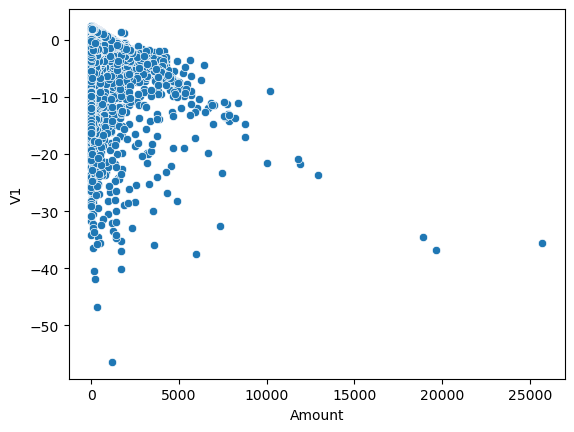

In [17]:
# Plotting the scatterplot
sns.scatterplot(x='Amount', y='V1', data=df)

 The statistic below shows the distribution of the fraud and non-fraud cases with 0= non-fraud and 1=fraud
0    284315
1       492
Name: Class, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


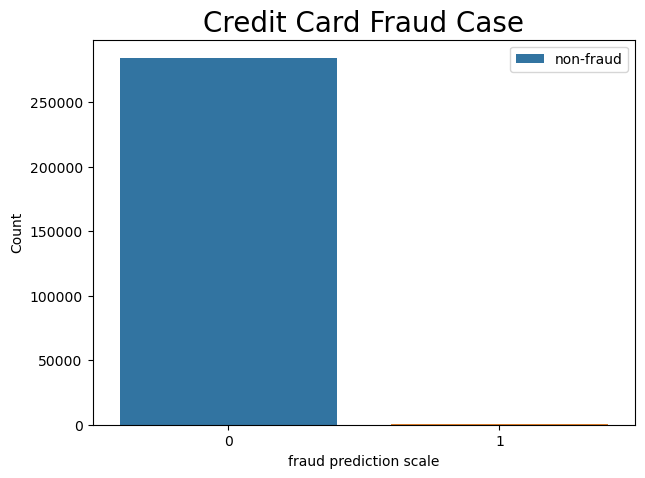

In [10]:
print(' The statistic below shows the distribution of the fraud and non-fraud cases with 0= non-fraud and 1=fraud')
print(df['Class'].value_counts())
plt.figure(figsize= (7,5))
plt.title('Credit Card Fraud Case', fontsize=20)
sns.countplot(df['Class'])
plt.legend(['non-fraud', 'fraud'])
plt.xlabel('fraud prediction scale')
plt.ylabel('Count')
plt.show()


0    284315
1    284315
Name: Class, dtype: int64


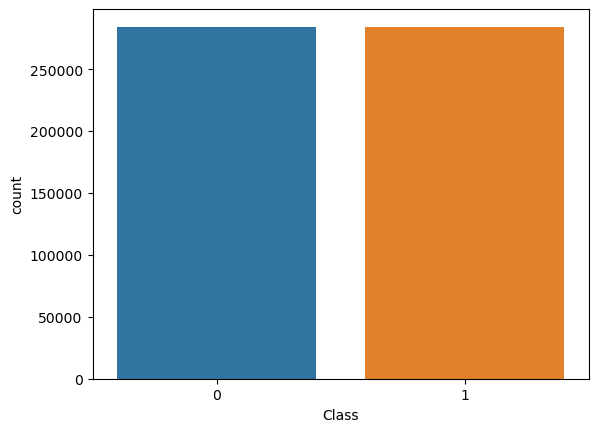

In [19]:
X = df.loc[:,df.columns!='Class']
y = df.loc[:,df.columns=='Class']

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_overSamp, y_overSamp = oversample.fit_resample(X, y)
ax = sns.countplot(x='Class',data=y_overSamp)
print(y_overSamp['Class'].value_counts())

<AxesSubplot:>

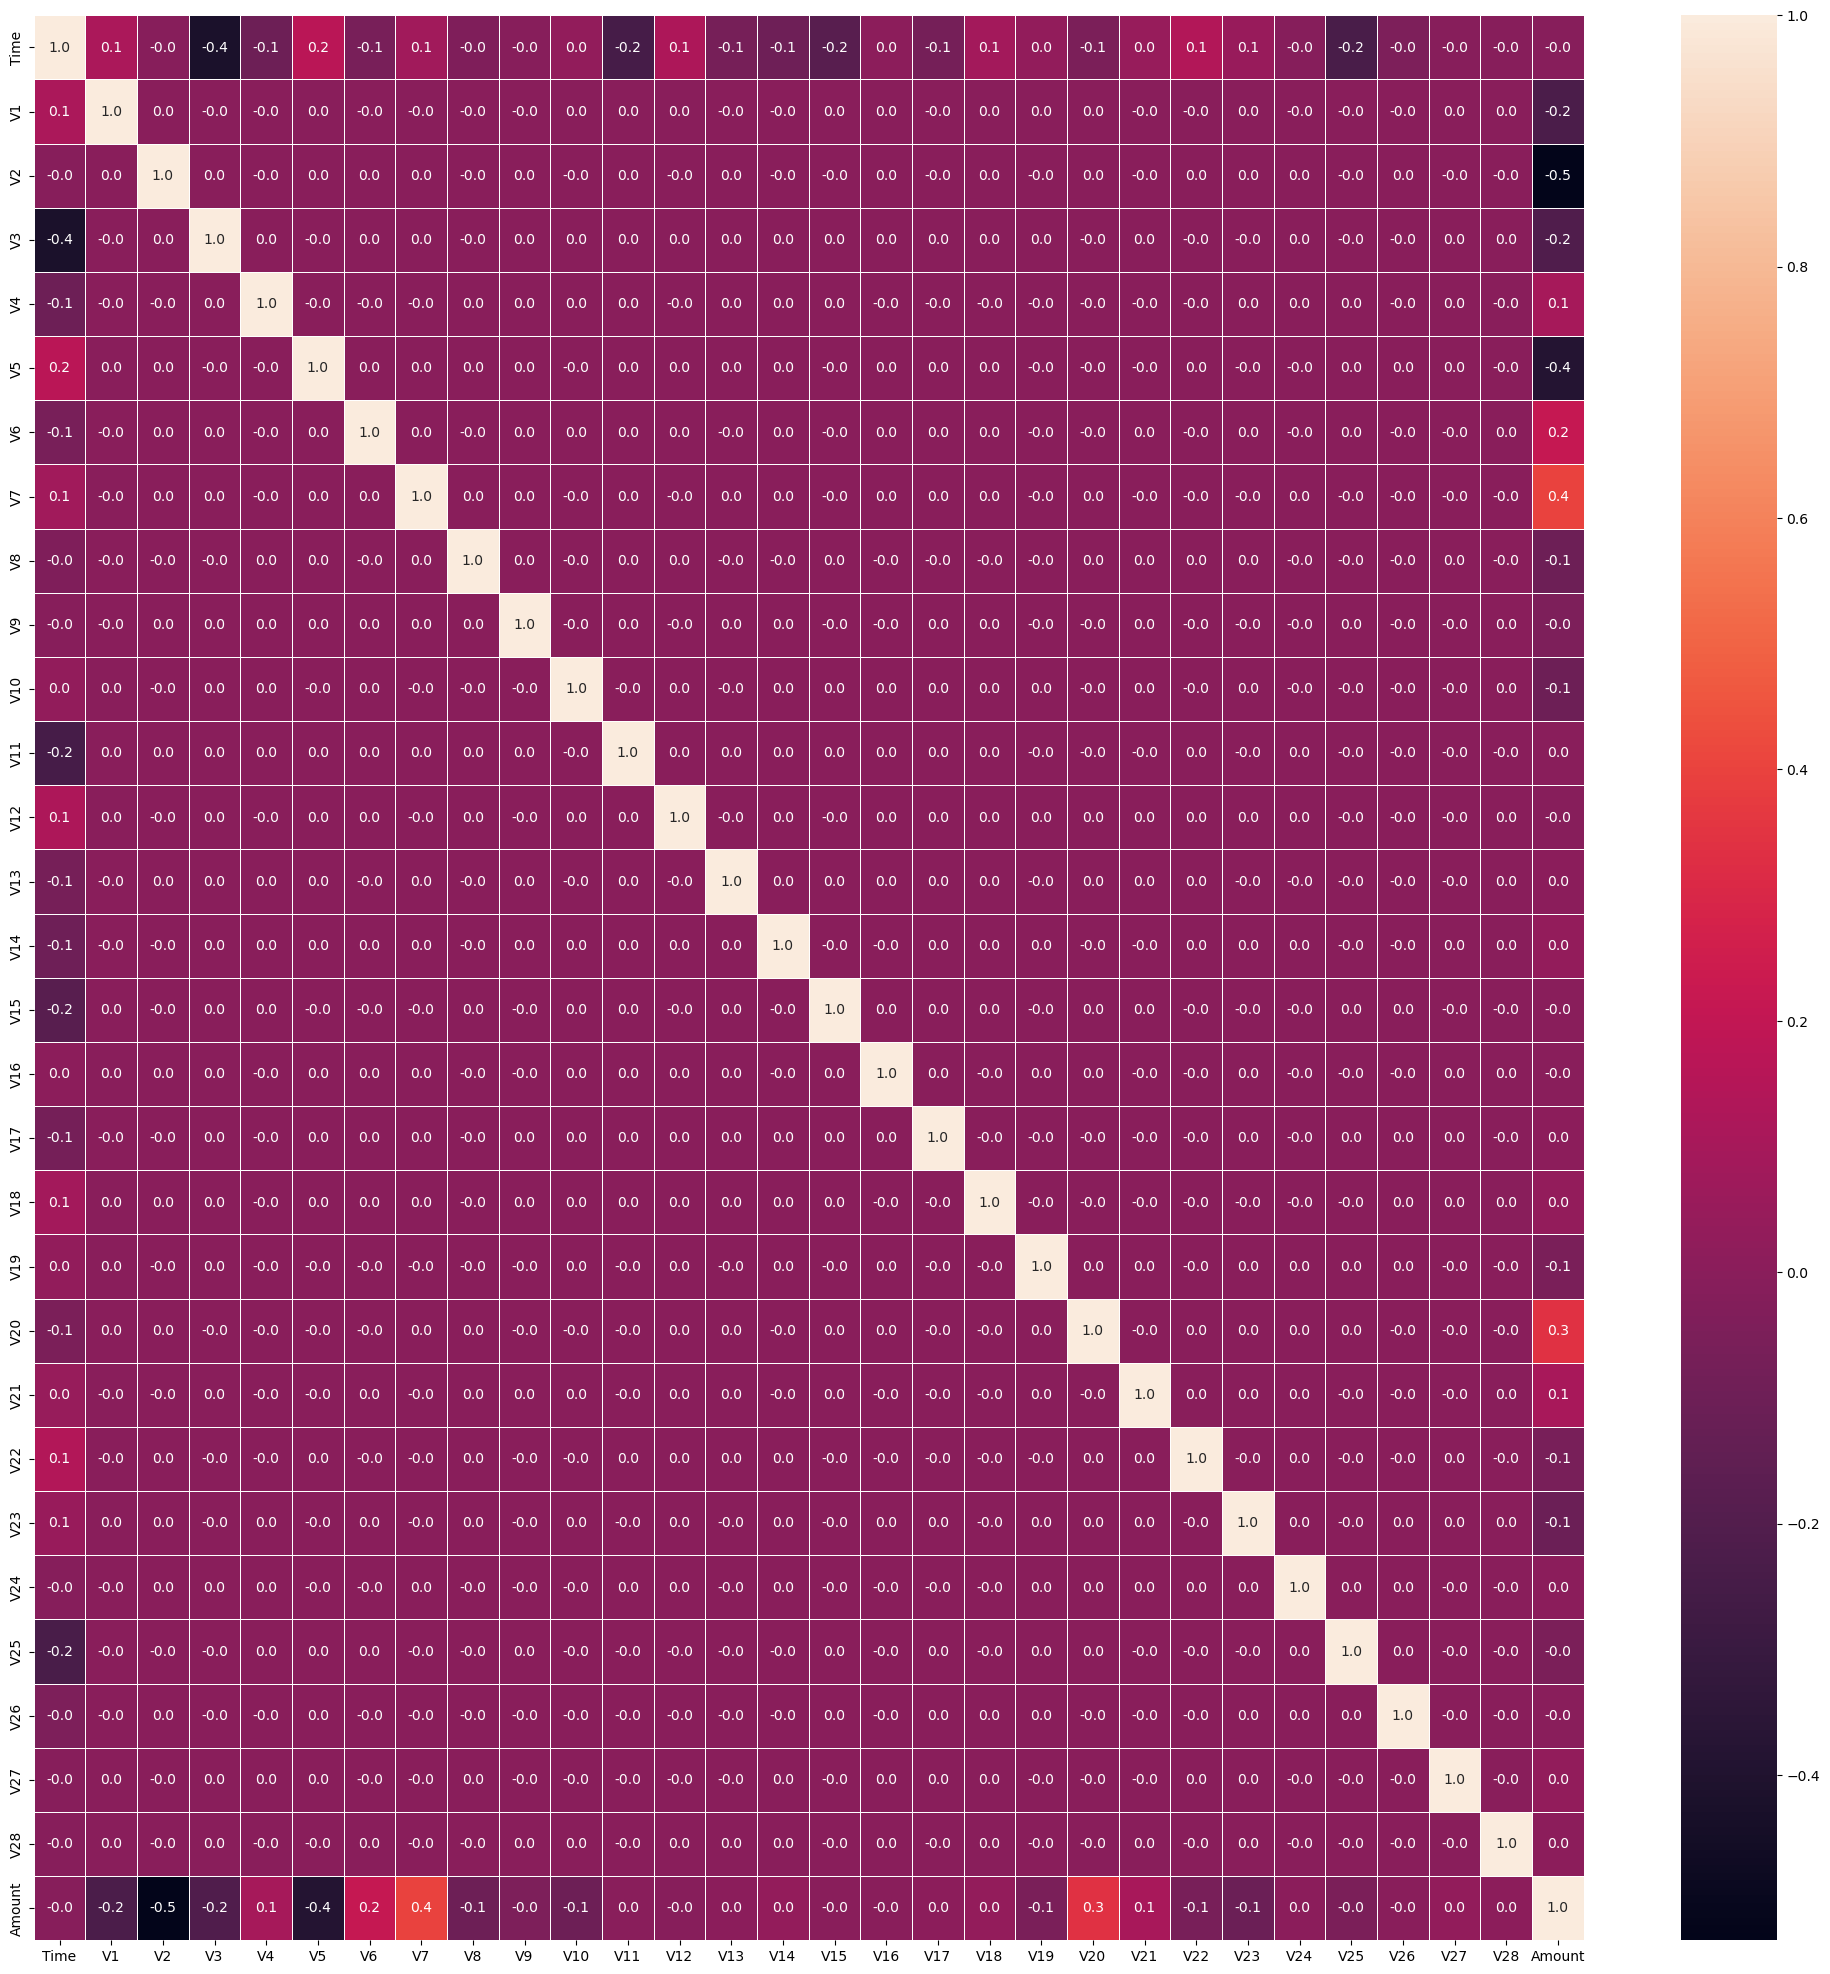

In [21]:
# check correlation
corr_asses = df.drop('Class', axis=1)
corr = corr_asses.corr()

#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_asses.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
# divide full data into features and label

spl1 = 0.3
spl2 = 0.3
X = df.loc[:, df.columns != 'Class']
y = df.loc[:, df.columns == 'Class']
# create train, test and validate datasets

# first split original into Train and Test+Val
X_train, X_test1, y_train, y_test1 = train_test_split(X,y, test_size = spl1, random_state = None, shuffle=True)
# then split Test+Val into Test and Validate
# Validate will only be used in the 2 Model system (explained below)
X_test, X_val, y_test, y_val = train_test_split(X_test1,y_test1, test_size = spl2, random_state = None, shuffle=True)

class_names=[0,1] # name  of classes 1=fraudulent transaction

y_val['Class'].value_counts()

0    25587
1       46
Name: Class, dtype: int64

In [12]:
# find the number of minority (value=1) samples in our train set so we can down-sample our majority to it
yes = len(y_train[y_train['Class'] ==1])
    
# retrieve the indices of the minority and majority samples 
yes_ind = y_train[y_train['Class'] == 1].index
no_ind = y_train[y_train['Class'] == 0].index

# random sample the majority indices based on the amount of 
# minority samples
new_no_ind = np.random.choice(no_ind, yes, replace = False)

# merge the two indices together
undersample_ind = np.concatenate([new_no_ind, yes_ind])

# get undersampled dataframe from the merged indices of the train dataset
X_train = X_train.loc[undersample_ind]
y_train = y_train.loc[undersample_ind]

y_train = np.array(y_train).flatten()


In [13]:
def visualize(Actual, Pred, Algo):
    #Confusion Matrix
    cnf_matrix=metrics.confusion_matrix(Actual, Pred) #

    #Visualize confusion matrix using heat map

    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix: '+Algo, y=1.1) 
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
def display_metrics(model_name, train_features, test_features, train_label, test_label, pred, algo):
    model_probs = model_name.predict_proba(test_features)
    n = model_name.predict_proba(test_features).shape[1]-1
    model_probs = model_probs[:, n]
    try:
        print(model_name.score(test_features, test_label)) 
        print("Accuracy score (training): {0:.3f}".format(model_name.score(train_features, train_label))) 
        print("Accuracy score (validation): {0:.3f}".format(model_name.score(test_features, test_label))) 
    except Exception as e:
        print("error")  
    try:
        print(pd.Series(model_name.feature_importances_, index=train_features.columns[:]).nlargest(10).plot(kind='barh')) 
    except Exception as e:
        print("error") 
    print("Confusion Matrix:")
    tn, fp, fn, tp = confusion_matrix(test_label, pred).ravel()
    total = tn+ fp+ fn+ tp 
    print("false positive pct:",(fp/total)*100) 
    print("tn", " fp", " fn", " tp") 
    print(tn, fp, fn, tp) 
    print(confusion_matrix(test_label, pred)) 
    print("Classification Report") 
    print(classification_report(test_label, pred))
    print("Specificity =", tn/(tn+fp))
    print("Sensitivity =", tp/(tp+fn))
    y=np.reshape(test_label.to_numpy(), -1)
    fpr, tpr, thresholds = metrics.roc_curve(y, model_probs, pos_label=1)
    cm_results.append([algo, tn, fp, fn, tp])
    cr_results.append([algo, classification_report(test_label, pred)])
    roc.append([algo, fpr, tpr, thresholds])
    # AUC score should be (Sensitivity+Specificity)/2
    print(algo + ':TEST | AUC Score: ' + str( round(metrics.auc(fpr, tpr),3 )))
    return tn, fp, fn, tp

In [15]:
def auc_roc_metrics(model, test_features, test_labels, algo): # model object, features, actual labels, name of algorithm
    # useful for imbalanced data
    ns_probs = [0 for _ in range(len(test_labels))]
    # predict probabilities
    model_probs = model.predict_proba(test_features)
    # keep probabilities for the positive outcome only
    n = model.predict_proba(test_features).shape[1]-1
    model_probs = model_probs[:, n]  
    model_auc = auc_roc_metrics_plots(model_probs, ns_probs, test_labels, algo) 
    return model_auc

In [16]:
def auc_roc_metrics_plots(model_probs, ns_probs, test_labels, algo):
    
    # calculate scores
    ns_auc = roc_auc_score(test_labels, ns_probs) # no skill
    model_auc = round(roc_auc_score(test_labels, model_probs), 3)

    # summarize scores
    print('%10s : ROC AUC=%.3f' % ('No Skill',ns_auc))
    print('%10s : ROC AUC=%.3f' % (algo,model_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
    # NameError: name 'ns_probs' is not defined
    model_fpr, model_tpr, _ = roc_curve(test_labels, model_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(model_fpr, model_tpr, marker='.', label='%s (area = %0.2f)' % (algo, model_auc))
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    pyplot.title('Receiver Operating Characteristic curve')
    # show the plot
    pyplot.show()
    return model_auc

In [15]:
# Define our custom loss function
def focal_loss(y_true, y_pred):
    gamma = 2.0
    alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

In [16]:
def prediction_cutoff(model, test_features, cutoff):
    model.predict_proba(test_features)
    # to get the probability in each class, 
    # for example, first column is probability of y=0 and second column is probability of y=1.

    # the probability of being y=1
    prob1=model.predict_proba(test_features)[:,1]
    predicted=[1 if i > cutoff else 0 for i in prob1]
    return predicted

In [17]:
metrics_results = {}
roc = []
cm_results = []
cr_results = []

In [18]:
#importing machine learning algorithms 
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train, sample_weight=np.where(y_train == 1,1.0,1.0).flatten())
rf_Pred=rf.predict(X_test)

In [20]:
# validating the classification report
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     59713
           1       0.05      0.92      0.09        97

    accuracy                           0.97     59810
   macro avg       0.52      0.94      0.54     59810
weighted avg       1.00      0.97      0.98     59810

0.9700718943320515
Accuracy score (training): 1.000
Accuracy score (validation): 0.970
AxesSubplot(0.125,0.11;0.775x0.77)
Confusion Matrix:


NameError: name 'confusion_matrix' is not defined

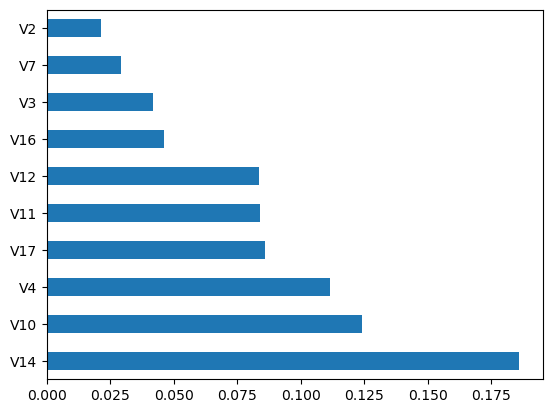

In [21]:
print(classification_report(y_test, rf_Pred))
tn, fp, fn, tp = display_metrics(rf, X_train, X_test, y_train, y_test, rf_Pred, 'RF')
visualize(y_test, rf_Pred, 'Random Forest')
rf_auc = auc_roc_metrics(rf, X_test, y_test, 'RF')
metrics_results['rf'] = rf_auc

In [ ]:
rec_count = len(df)
sequence_length = 10

In [22]:
def generate_data(X, y, sequence_length = 10, step = 1):
    print ( '===x===', X )
    print ( '===x===', X.shape )
    X_local = []
    y_local = []

    for start in range(0, len(df) - sequence_length, step):
        end = start + sequence_length

        #print('--start---', start, '----end-----', end )
        #print('---X[0]---', X[0])
        X_local.append(X[start:end])
        y_local.append(y[end-1])
        #print('X_local ', X_local )
    return np.array(X_local), np.array(y_local)

In [23]:
X_sequence, y_class  = generate_data(df.loc[:, "V1":"V28"].values, df.Class)

print('y_class ', y_class )

===x=== [[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ... -1.89114844e-01
   1.33558377e-01 -2.10530535e-02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ...  1.25894532e-01
  -8.98309914e-03  1.47241692e-02]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -1.39096572e-01
  -5.53527940e-02 -5.97518406e-02]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ... -8.73705959e-02
   4.45477214e-03 -2.65608286e-02]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  5.46668462e-01
   1.08820735e-01  1.04532821e-01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -8.18267121e-01
  -2.41530880e-03  1.36489143e-02]]
===x=== (284807, 28)
y_class  [0 0 0 ... 0 0 0]


In [24]:
print( 'X_sequence.shape=>', X_sequence.shape)
print( 'Y Shape =>', y_class.shape)

X_sequence.shape=> (284797, 10, 28)
Y Shape => (284797,)


In [25]:
#using Recurrent Neural Network LSTM Model 
epo=10
model = keras.Sequential()
#-------------------------- step sequence,       28 variables
#--------------------------      Time Sequence,  Features
model.add(LSTM(100, input_shape = (10, 28)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=['accuracy']
              , optimizer="adam")

In [37]:
#Training the neural network
training_size = int(len(X_sequence) * 0.7)
X_train, y_train = X_sequence[:training_size], y_class[:training_size]
X_test, y_test = X_sequence[training_size:], y_class [training_size:]

history = model.fit(X_train, y_train, batch_size=2000, epochs=epo, validation_data= (X_test, y_test))

print(model.evaluate(X_test, y_test))
y_test_prob = model.predict(X_test, verbose=1)

Epoch 1/10
100/100 [==============================] - 26s 257ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 2/10
100/100 [==============================] - 26s 263ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 3/10
100/100 [==============================] - 27s 273ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 4/10
100/100 [==============================] - 27s 268ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 5/10
100/100 [==============================] - 26s 263ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 6/10
100/100 [==============================] - 26s 261ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 7/10
100/100 [==============================] - 26s 262ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0025 - val_ac

In [38]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 51,701
Trainable params: 51,701
Non-trainable params: 0
_________________________________________________________________


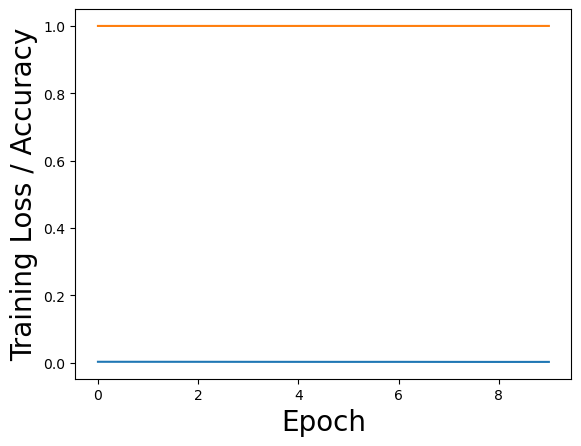

In [39]:
#A plot showing the accuracy vs the validation accuracy
import matplotlib.pyplot as pyplot
plt.plot(history.history['loss'], label='epo={}, loss'.format(epo))
plt.plot(history.history['accuracy'], label='epo={}, accuracy'.format(epo))
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Training Loss / Accuracy', fontsize=20)
plt.show()

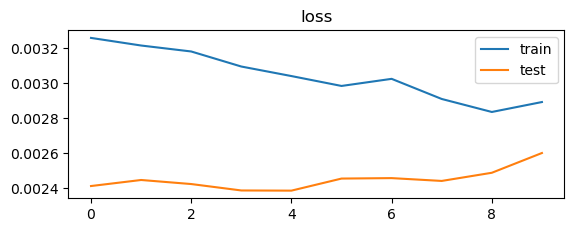

In [40]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.legend()
pyplot.show()

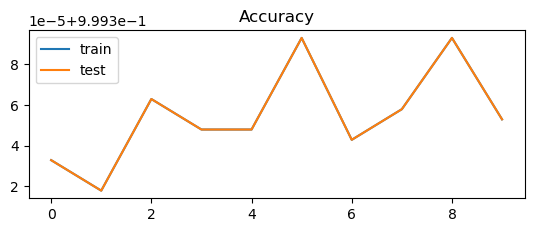

In [41]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [42]:
print ( '=======================y_test_prob ', y_test_prob  )

y_test_pred = np.where(y_test_prob > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

=======================y_test_prob  [[8.1482714e-05]
 [3.0900941e-05]
 [2.1866175e-05]
 ...
 [9.1938400e-06]
 [2.2010405e-05]
 [2.3925768e-05]]
[[85331     1]
 [   30    78]]


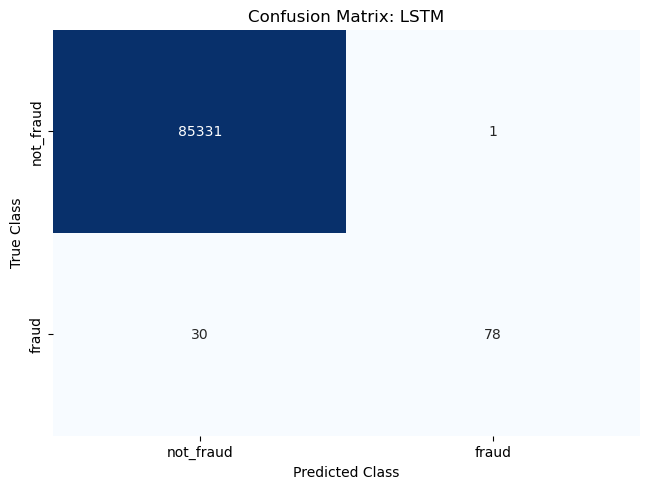

In [43]:
# showing the confusion matrix of the LSTM Model
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
matrix_logit = confusion_matrix(y_test, y_test_pred)
cm_plot = pd.DataFrame(matrix_logit, index = ['not_fraud', 'fraud'], columns = ['not_fraud', 'fraud'])
sns.heatmap (cm_plot, annot=True, cbar=None, cmap='Blues', fmt = 'g')
plt.title('Confusion Matrix: LSTM'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

In [44]:
# Showing the classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('Classification report:\n', classification_report(y_test, y_test_pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df= cm_df.rename(index= {0: 'Actual 0', 1:'Actual 1'})
cm_df

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85332
           1       0.99      0.72      0.83       108

    accuracy                           1.00     85440
   macro avg       0.99      0.86      0.92     85440
weighted avg       1.00      1.00      1.00     85440



,Predicted 0,Predicted 1
Actual 0,85331,1
Actual 1,30,78


In [45]:
accuracy = accuracy_score (y_test, y_test_pred)
print(accuracy)

0.9996371722846442
